<font color=black>
    
# MATH 497: Midterm 

<font color=blue>
    
### Numpy Edition

<font color=black>
    
#### Kendra Noneman
November 6, 2019

##### Step 1: Import Packages

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path= "/Users/kendranoneman/Desktop/College/19fall/MATH497/Assignments/midterm"

plt.style.use(['ggplot'])

##### Step 2: Load Data from .npz File

In [76]:
with np.load('Noneman_Midterm_Data.npz', allow_pickle=True) as data:
    X_train = data['xTrain'] 
    X_val = data['xVal'] 
    y_train = data['yTrain']
    y_val = np.array(data['yVal']).astype(int)

##### Step 3: What is the shape of the data?

In [77]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_val.shape)
print('Test labels shape: ', y_val.shape)

Training data shape:  (80, 4)
Training labels shape:  (80,)
Test data shape:  (20, 4)
Test labels shape:  (20,)


##### Step 4: Obtain a function to minimize y

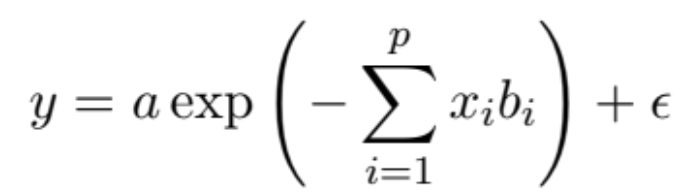

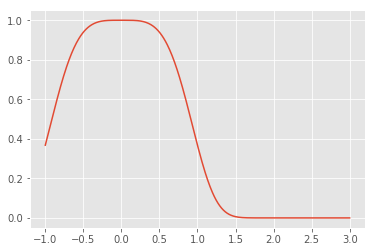

In [89]:
function = lambda x:2.7182818**(-x**4)

#Get 1000 evenly spaced numbers between -1 and 3 (arbitratil chosen to ensure steep curve)
x = np.linspace(-1,3,500)

#Plot the curve
plt.plot(x, function(x))
plt.show()

##### Step 5: Initialize a value x from which to start the descent or optimization from

In [78]:
def train(self, X, y, learning_rate=1e-3, reg=1e-5, num_iters=100, batch_size=200, verbose=False):

    num_train, dim = X.shape
    num_classes = np.max(int(y)) + 1 
    if self.W is None:
        self.W = 0.001 * np.random.randn(dim, num_classes)


    loss_history = []
    for it in range(num_iters):
        X_batch = None
        y_batch = None

        mask = np.random.choice(num_train, batch_size, replace=False)
        X_batch = X[mask , :]
        y_batch = y[mask]
        
        loss, grad = self.loss(X_batch, y_batch, reg)
        loss_history.append(loss)
        
        self.W -= grad * learning_rate
        if verbose and it % 100 == 0:
                print('iteration %d / %d: loss %f' % (it, num_iters, loss))

    return loss_history

def predict(self, X):

    y_pred = np.zeros(X.shape[0])
    y_pred = np.argmax(X.dot(self.W), axis=1)
    return y_pred

def loss(self, X_batch, y_batch, reg):
    pass

##### Step 6: Specify a learning rate that will determine how much of a step to descend by or how quickly you converge to the minimum value

In [79]:
from classifiers.softmax import softmax_loss_vectorized
import time

W = np.random.randn(4, 10) * 0.0001

tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_val, int(y_val[0]), 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))
print(grad_vectorized)

vectorized loss: 2.302429e+00 computed in 0.000465s
[[ 0.1190625   0.11903006  0.11909158 -1.07148708  0.11903717  0.11904745
   0.11906489  0.11904039  0.11906651  0.11904653]
 [ 0.10464112  0.10461513  0.10467482 -0.94172378  0.1046219   0.1046311
   0.10464269  0.10462788  0.10464426  0.10462489]
 [ 0.09496946  0.09493964  0.09499655 -0.85467804  0.09495254  0.09495583
   0.09497677  0.09495712  0.09497658  0.09495354]
 [ 0.08982347  0.08979706  0.08985159 -0.80840553  0.08981116  0.08982319
   0.08982745  0.0898265   0.08983217  0.08981293]]


###### Step 7: Obtain the derivative of that value x (the descent)

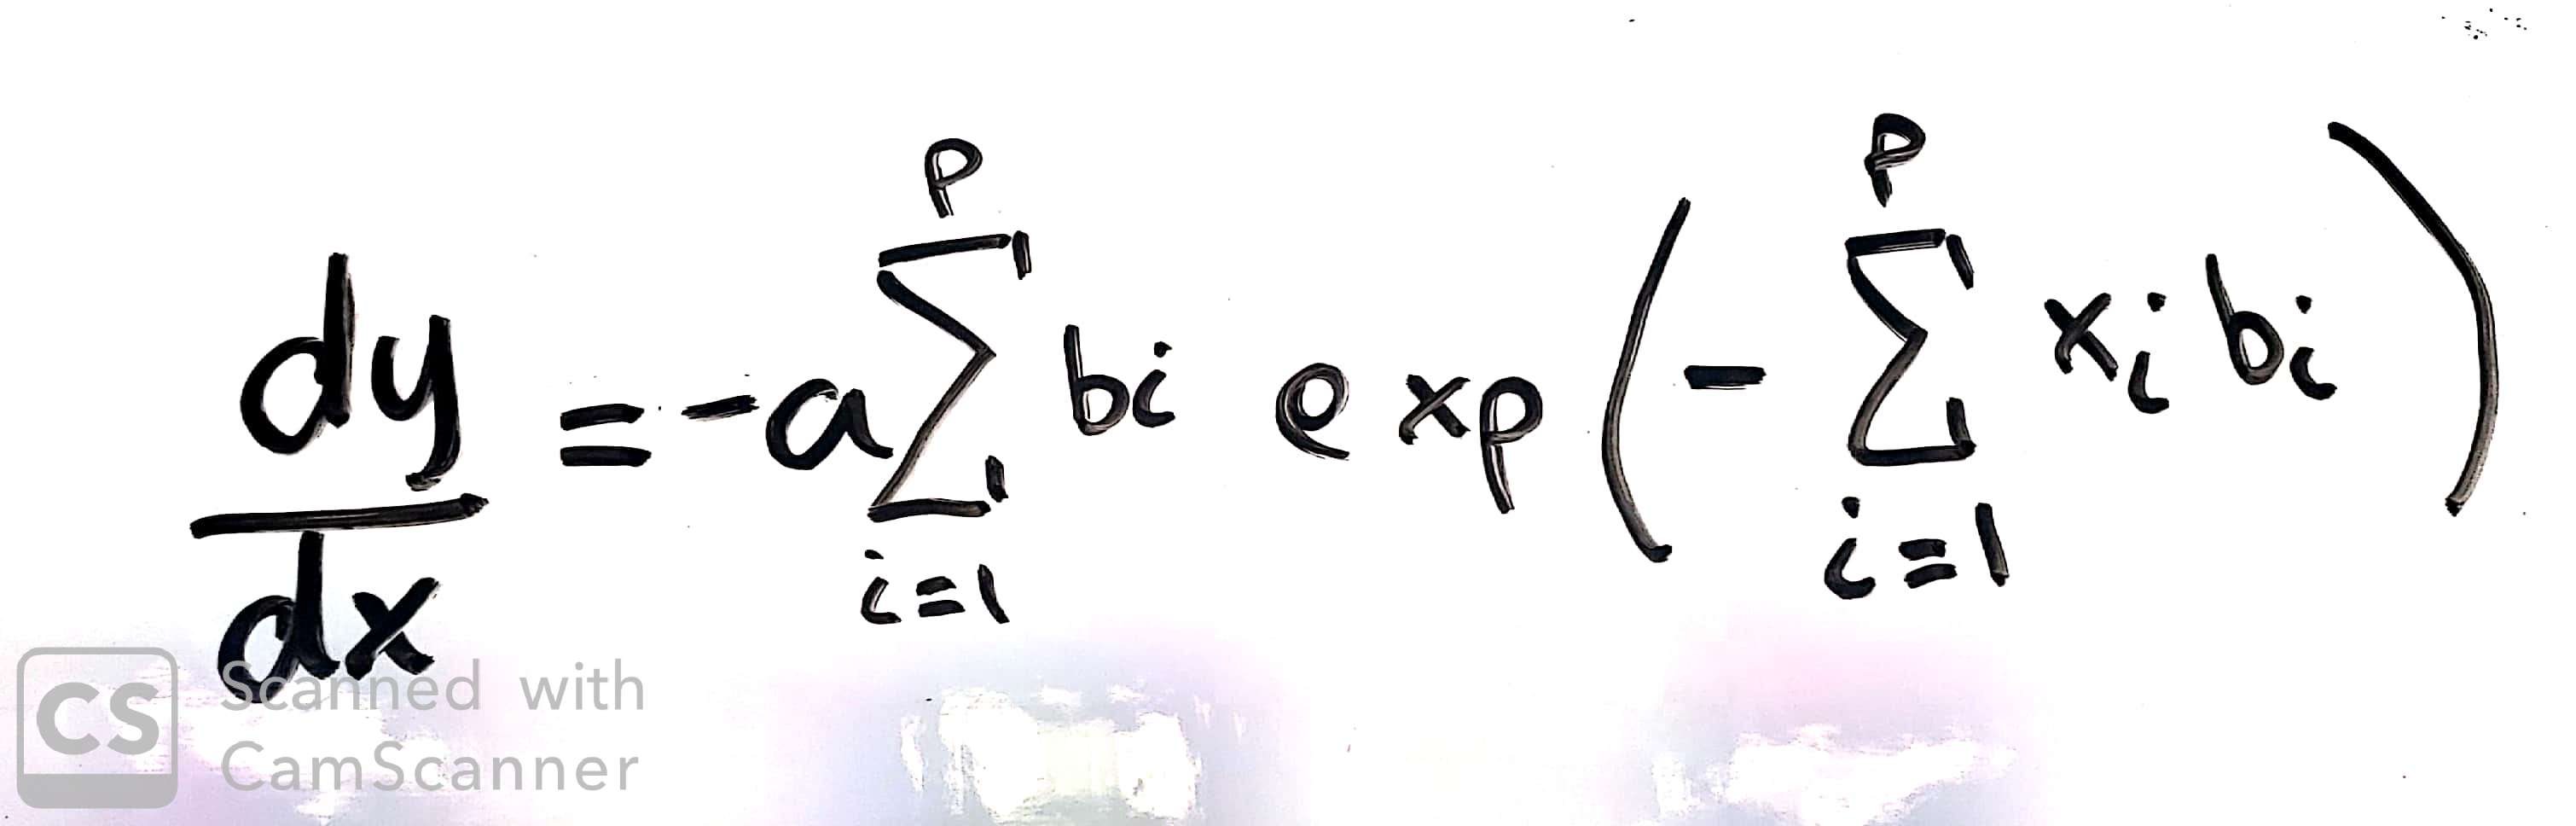

In [94]:
def deriv(x):
    y_deriv = 2.7182818**(-x**4)
    return y_deriv

In [91]:
from classifiers.linear_classifier import Softmax
results = {}
best_val = -1
best_softmax = None
learning_rates = [1e-7, 5e-7]
regularization_strengths = [2.5e4, 5e4]

for i in learning_rates:
    for j in regularization_strengths:
        softmax = Softmax()
        softmax.train(X_train, y_train, learning_rate = i, reg = j, num_iters = 5000)
        y_train_pred = softmax.predict(X_train)
        y_val_pred = softmax.predict(X_val)
        train_acc = np.mean(y_train == y_train_pred)
        val_acc = np.mean(y_val == y_val_pred)
        results[(i, j)] = (train_acc, val_acc)
        
        if best_val < val_acc:
            best_val = val_acc
            best_softmax = softmax
            
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

##### Step 8: Proceed to descend by the derivative of that value multiplied by the learning rate

In [95]:
def step(x_new, x_prev, precision, l_r):
    
    x_list, y_list = [x_new], [function(x_new)]
    
    while abs(x_new - x_prev) > precision:

        x_prev = x_new

        d_x = - deriv(x_prev)

        x_new = x_prev + (l_r * d_x)

        x_list.append(x_new)
        
        y_list.append(function(x_new))

    print ("Local minimum occurs at: "+ str(x_new))
    print ("Number of steps: " + str(len(x_list)))
    
    
    plt.subplot(1,2,2)
    plt.scatter(x_list,y_list,c="g")
    plt.plot(x_list,y_list,c="g")
    plt.plot(x,function(x), c="r")
    plt.title("Gradient descent")
    plt.show()

    plt.subplot(1,2,1)
    plt.scatter(x_list,y_list,c="g")
    plt.plot(x_list,y_list,c="g")
    plt.plot(x,function(x), c="r")
    plt.xlim([1.0,2.1])
    plt.title("Zoomed in Gradient descent to Key Area")
    plt.show()

Local minimum occurs at: -1.4080244631764312
Number of steps: 143


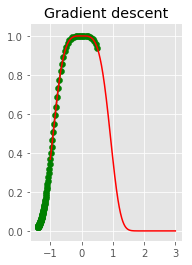

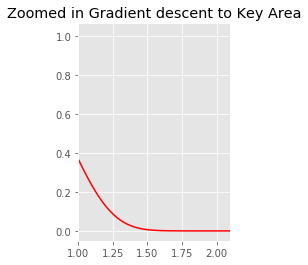

In [96]:
step(0.5, 0, 0.001, 0.05)

Text(0, 0.5, '$y$')

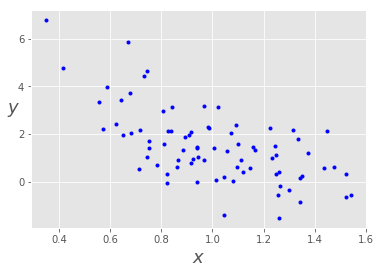

In [73]:
#Training data
plt.plot(X_train_avg,y_train,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

Text(0, 0.5, '$y$')

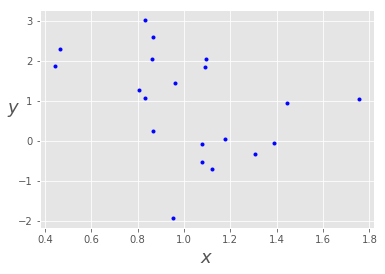

In [128]:
#Testing data
plt.plot(X_val_avg,y_val,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

In [75]:
#Training Data
X_train_b = np.c_[np.ones((80,1)),X_train_avg]
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
print(theta_best)

[ 5.03874274 -3.55600968]


In [130]:
#Testing Data
X_val_b = np.c_[np.ones((20,1)),X_val_avg]
theta_best_val = np.linalg.inv(X_val_b.T.dot(X_val_b)).dot(X_val_b.T).dot(y_val)
print(theta_best_val)

[ 2.52734072 -1.58237016]


In [76]:
#Training Data
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([ 5.03874274, -2.07327662])

In [131]:
#Testing Data
X_new_val = np.array([[0],[2]])
X_new_b_val = np.c_[np.ones((2,1)),X_new_val]
y_predict_val = X_new_b_val.dot(theta_best_val)
y_predict_val

array([ 2.52734072, -0.6373996 ])

Text(0, 0.5, '$y$')

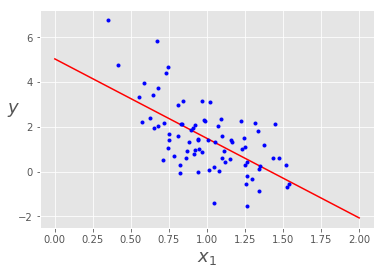

In [79]:
#Training Data
plt.plot(X_new,y_predict,'r-')
plt.plot(X_train_avg,y_train,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

Text(0, 0.5, '$y$')

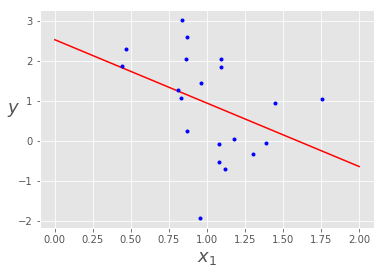

In [132]:
#Testing Data
plt.plot(X_new_val,y_predict_val,'r-')
plt.plot(X_val_avg,y_val,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

In [85]:
def  cal_cost(theta,X_train_avg,y_train):
    
    m = len(y_train)
    
    predictions = X_train_avg.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y_train))
    return cost

In [117]:
def gradient_descent(X_train_avg,y_train,theta,learning_rate=0.01,iterations=100):

    m = len(y_train)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X_train_avg,theta)
        
        theta = theta -(1/m)*learning_rate*( X_train_avg.T.dot((prediction - y_train)))
        theta_history[it,:] =theta.T[0]
        cost_history[it]  = cal_cost(theta,X_train_avg,y_train)
        
    return theta, cost_history, theta_history

In [118]:
#Training Data
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_train_b = np.c_[np.ones((len(X_train_avg),1)),X_train_avg]
theta,cost_history,theta_history = gradient_descent(X_train_b,y_train,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          1.123,
Theta1:          0.184
Final cost/MSE:  6472.916


In [133]:
#Testing Data
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_val_b = np.c_[np.ones((len(X_val_avg),1)),X_val_avg]
theta,cost_history,theta_history = gradient_descent(X_val_b,y_val,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          1.671,
Theta1:          1.257
Final cost/MSE:  185.758


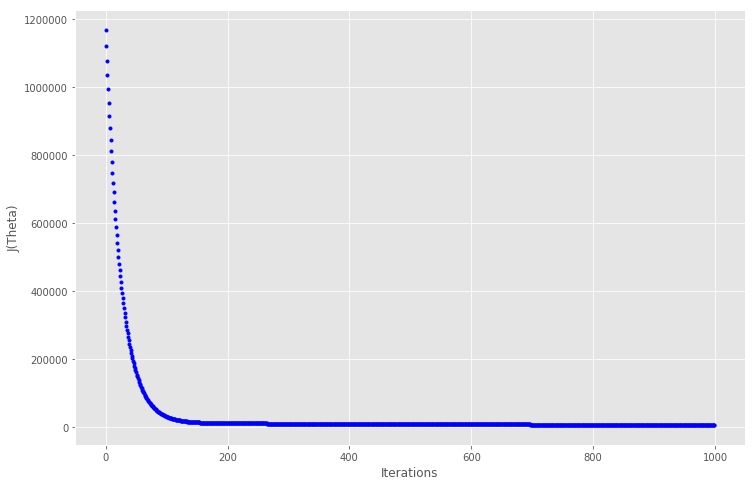

In [119]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

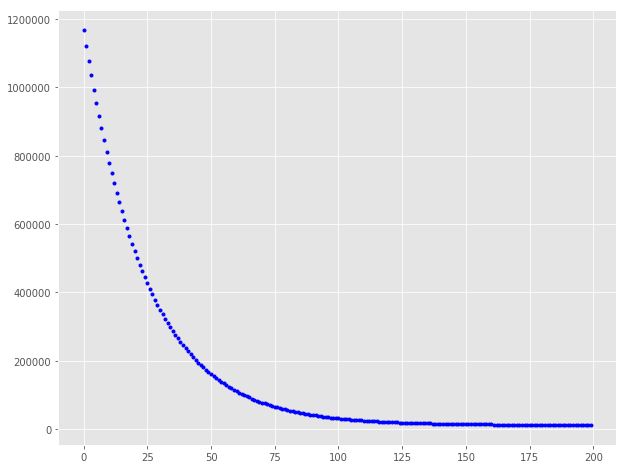

In [120]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

In [123]:
def plot_GD(n_iter,lr,ax,ax1=None):

     _ = ax.plot(X_train_avg,y_train,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_train_b.dot(theta)
        theta,h,_ = gradient_descent(X_train_b,y_train,theta,lr,1)
        pred = X_train_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X_train_avg,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')

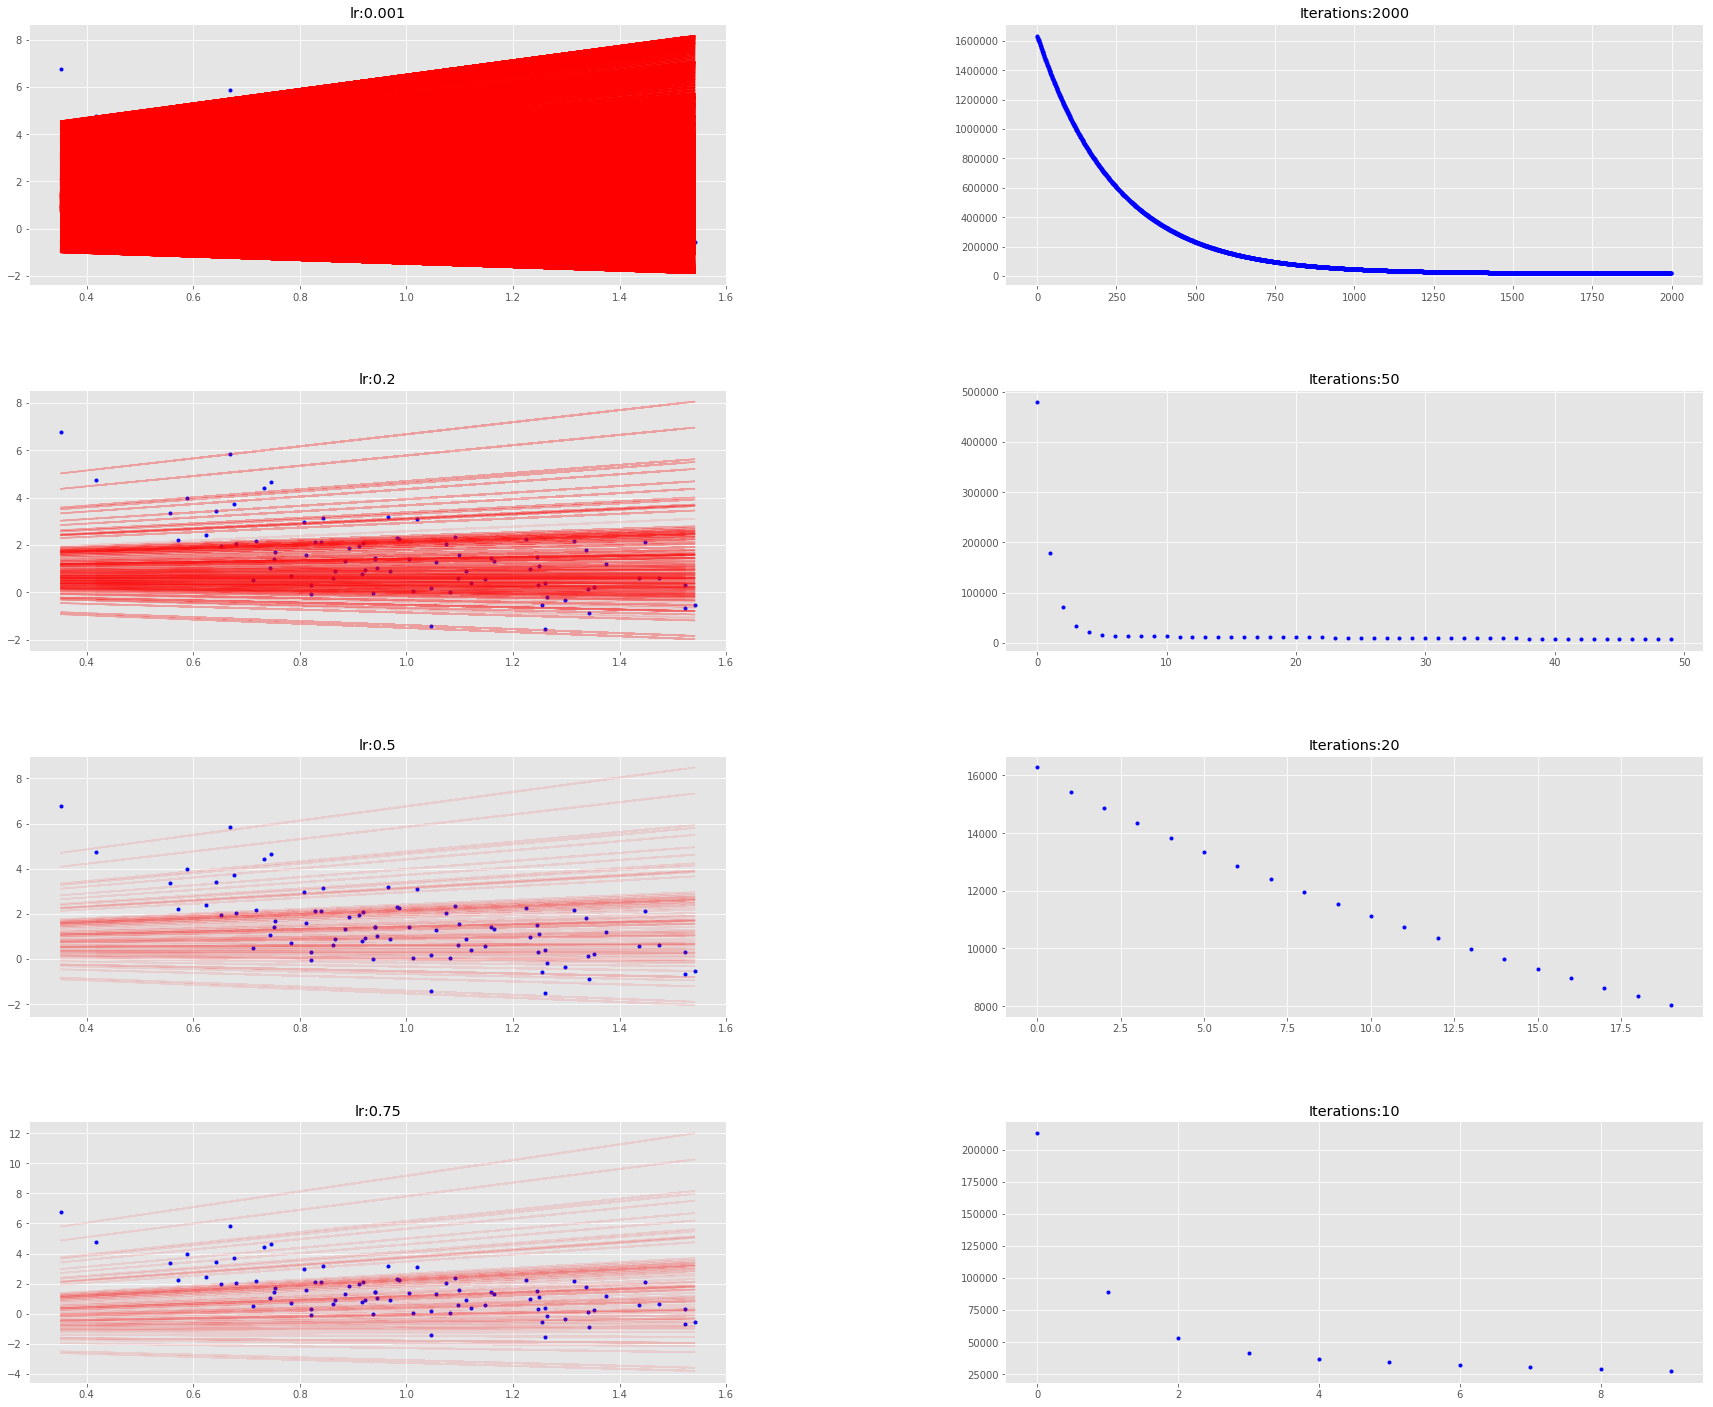

In [127]:
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(50,0.2),(20,0.5),(10,0.75)] #(100,0.1)
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)